In [2]:
# Scientific computing imports
import itertools
import numpy
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn; seaborn.set()

from shipnet_randv1_1 import MultiPlex,ShipNET

In [3]:
# set directory

import os
import glob

os.chdir("C:\Users\colinsh\Documents\compship\Data")
os.listdir("./")

# Using glob to list the output directory
glob.glob("simpleship_wred_50/ship-*")[0:5]

['simpleship_wred_50\\ship-bh1-h3-red1-20151015-0',
 'simpleship_wred_50\\ship-bh1-h3-red1-20151015-1',
 'simpleship_wred_50\\ship-bh1-h3-red1-20151015-10',
 'simpleship_wred_50\\ship-bh1-h3-red1-20151015-100',
 'simpleship_wred_50\\ship-bh1-h3-red1-20151015-101']

In [4]:
all_data = pd.read_csv(os.path.join("simpleship_wred_50", "series_all.csv"),index_col=None)
#all_data = pd.read_csv(os.path.join("simpleship_all50", "series_all.csv"),index_col=None)
#all_data = pd.read_csv(os.path.join("warship_perm_noexc_fullh_trans", "series_all.csv"),index_col=None)
#type_data = pd.read_csv(os.path.join("simple_perm_noexc", "series_type.csv"),index_col=None)

In [4]:
#all_data=all_data.drop(all_data.columns[[0]],axis=1)
print all_data

      num_bh  height_dc  redundancy  permeability  interactions_total  \
0          1          3           2             0        1.298074e+33   
1          1          3           2             0        2.596148e+33   
2          1          3           2             0        2.596148e+33   
3          1          3           2             0        6.490371e+32   
4          1          3           2             0        1.298074e+33   
5          1          3           2             0        8.112964e+31   
6          1          3           2             0        1.622593e+32   
7          1          3           2             0        2.596148e+33   
8          1          3           2             0        1.298074e+33   
9          1          3           2             0        2.596148e+33   
10         1          3           2             0        1.298074e+33   
11         1          3           2             0        8.112964e+31   
12         1          3           2             0  

In [5]:
ship=ShipNET([8,3,6])
for x in range(2):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
for x in range(6,8):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
ship.remove_ship_node((0,0,0))
ship.remove_ship_node((0,1,0))
ship.remove_ship_node((0,2,0))

In [10]:
print all_data #[['num_bh','height_dc']]

      num_bh  height_dc  redundancy  permeability  interactions_total  \
0          1          3           2             0        1.298074e+33   
1          1          3           2             0        2.596148e+33   
2          1          3           2             0        2.596148e+33   
3          1          3           2             0        6.490371e+32   
4          1          3           2             0        1.298074e+33   
5          1          3           2             0        8.112964e+31   
6          1          3           2             0        1.622593e+32   
7          1          3           2             0        2.596148e+33   
8          1          3           2             0        1.298074e+33   
9          1          3           2             0        2.596148e+33   
10         1          3           2             0        1.298074e+33   
11         1          3           2             0        8.112964e+31   
12         1          3           2             0  

In [6]:
nodes=[]
for n in ship.ship.nodes():
    nodes.append(str(n))

edges=[]
for e in ship.ship.edges():
    edges.append(str(e))

In [39]:
node_max=all_data[nodes].max()
ratio_total=all_data.apply(lambda row: row[nodes].max()/row['interactions_total'],axis=1)   
ratio_nodes=all_data.apply(lambda row: row[nodes].max()/row['node_total'],axis=1)   
ratio_edges=all_data.apply(lambda row: row[edges].max()/row['edge_total'],axis=1)   
print ratio_total
print ratio_nodes
print ratio_edges

0     0.997457
1     0.985146
2     0.996612
3     0.964347
4     0.986467
5     0.964946
6     0.998089
7     0.950233
8     0.995149
9     0.991058
10    0.997297
11    0.993512
12    0.957365
13    0.995666
14    0.994937
...
315    0.933487
316    0.936315
317    0.937855
318    0.961482
319    0.924023
320    0.987856
321    0.868096
322    0.995081
323    0.988430
324    0.986739
325    0.980344
326    0.987627
327    0.777161
328    0.931038
329    0.958813
Length: 330, dtype: float64
0     0.997506
1     0.985460
2     0.996713
3     0.964954
4     0.986769
5     0.965516
6     0.998139
7     0.950912
8     0.995250
9     0.991224
10    0.997365
11    0.993682
12    0.957695
13    0.995730
14    0.995080
...
315    0.933690
316    0.936496
317    0.938019
318    0.961652
319    0.924350
320    0.987954
321    0.868473
322    0.995204
323    0.988515
324    0.986886
325    0.980468
326    0.987720
327    0.777614
328    0.931290
329    0.958985
Length: 330, dtype: float64
0     

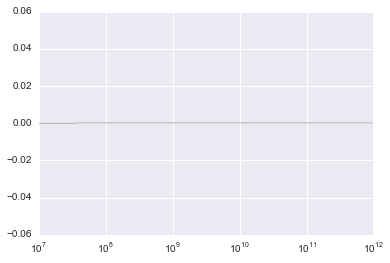

In [14]:


slct_data=[]
for h in range(3,4):
    for r in range(0,11):
        red=r/10.0
        #print h,red
        slct_data.append(list(all_data.loc[(all_data["height_dc"] == h) & (all_data["permeability"]==red),
                                     "interactions_total"]))
slct_data=list(itertools.chain(*slct_data))
#print slct_data
f = plt.figure()
plt.hist(slct_data, bins=numpy.logspace(7.0, 12.0, 10))
plt.gca().set_xscale("log")
#_ = plt.hist(slct_data,bins=numpy.logspace(0, 12,12),color="red",alpha=0.25) #,bins=numpy.logspace(0, 12)

In [7]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [8]:
all_data['int_log']=all_data.apply(lambda row: numpy.log10(row['interactions_total']),axis=1)

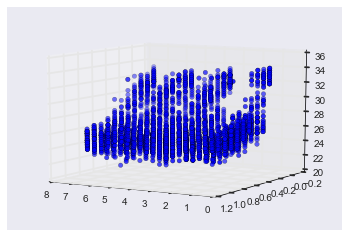

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(list(all_data['num_bh']),
               list(all_data['permeability']),
               list(all_data['int_log']))
#ax.set_zscale('log')
#ax.set_zlim(10**20,10**12)
ax.view_init(elev=10.,azim=120)
#for ii in xrange(0,360,1):
    #ax.view_init(elev=10., azim=ii)
    #fig.savefig("movie{}.png".format(ii))

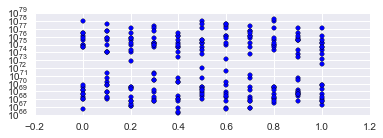

In [147]:
#transitions for fullh_noexc
fig=plt.figure()
ax=fig.add_subplot(2,1,1)
ax.scatter(all_data['permeability'],all_data['interactions_total'])
ax.set_yscale('log')

In [9]:
averages=all_data.groupby(['num_bh','permeability','redundancy']).mean()
averages

height_dc  interactions_total    node_total  \
num_bh permeability redundancy                                                
1      0.0          1                   3        1.044790e+26  1.044790e+26   
                    2                   3        1.857160e+29  1.857160e+29   
                    3                   3        2.357040e+29  2.357040e+29   
                    4                   3        1.744013e+29  1.744013e+29   
       0.1          1                   3        1.102089e+26  1.102088e+26   
                    2                   3        5.999389e+28  5.999389e+28   
                    3                   3        1.169013e+29  1.169013e+29   
                    4                   3        9.469414e+28  9.469413e+28   
       0.2          1                   3        1.414466e+25  1.414466e+25   
                    2                   3        6.600258e+28  6.600257e+28   
                    3                   3        6.994822e+28  6.994821e+28   
                    4                   3        2.734548e+28  2.734548e+28   
       0.3          1                   3        2.684083e+19  2.684078e+19   
                    2                   3        1.902098e+28  1.902098e+28   
                    3                   3        7.369051e+28  7.369050e+28   
                    4                   3        9.971359e+27  9.971359e+27   
       0.4          1                   3        1.107126e+19  1.107125e+19   
                    2                   3        3.232739e+25  3.232739e+25   
                    3                   3        8.018115e+26  8.018111e+26   
                    4                   3        1.334596e+25  1.334596e+25   
       0.5          1                   3        6.667674e+18  6.667672e+18   
                    2                   3        1.586282e+27  1.586282e+27   
                    3                   3        1.807964e+27  1.807964e+27   
                    4                   3        8.644019e+24  8.644018e+24   
       0.6          1                   3        7.988258e+17  7.988250e+17   
                    2                   3        7.924855e+26  7.924854e+26   
                    3                   3        3.730470e+24  3.730468e+24   
                    4                   3        4.528422e+23  4.528422e+23   
       0.7          1                   3        2.511516e+19  2.511516e+19   
                    2                   3        1.771477e+22  1.771477e+22   
...                                   ...                 ...           ...   
7      0.3          3                   3        6.212987e+27  6.212986e+27   
                    4                   3        3.340449e+27  3.340448e+27   
       0.4          1                   3        2.014450e+26  2.014450e+26   
                    2                   3        2.040138e+27  2.040138e+27   
                    3                   3        3.967597e+26  3.967595e+26   
                    4                   3        1.785895e+26  1.785895e+26   
       0.5          1                   3        1.213026e+22  1.213025e+22   
                    2                   3        1.196904e+26  1.196904e+26   
                    3                   3        2.092001e+25  2.092001e+25   
                    4                   3        2.596787e+26  2.596787e+26   
       0.6          1                   3        4.022119e+20  4.022118e+20   
                    2                   3        3.895032e+24  3.895032e+24   
                    3                   3        2.803665e+23  2.803664e+23   
                    4                   3        8.134471e+25  8.134471e+25   
       0.7          1                   3        1.116695e+20  1.116695e+20   
                    2                   3        3.516963e+22  3.516963e+22   
                    3                   3        2.161076e+23  2.161075e+23   
                    4                   3        3.153393e+23  3.153392e+23   
   

In [25]:
#av_sep=averages.unstack(level=1)
av_sep=averages.reset_index()
av_sep.loc[av_sep['redundancy']==1]

#all_data.loc[(all_data["height_dc"] == h)

,num_bh,permeability,redundancy,height_dc,interactions_total,node_total,edge_total,"(4, 2, 2)","(3, 0, 3)","(7, 1, 3)",...,"((0, 1, 3), (1, 1, 3))","((5, 1, 4), (5, 2, 4))","((4, 0, 1), (3, 0, 1))","((5, 2, 4), (4, 2, 4))","((5, 2, 4), (5, 2, 5))","((6, 2, 3), (6, 1, 3))","((6, 2, 1), (6, 1, 1))","((2, 1, 2), (2, 2, 2))","((2, 1, 0), (2, 2, 0))",int_log
0,1,0.0,1,3,1.044790e+26,1.044790e+26,4.462966e+19,1.00,1,5.08,...,1.795686e+05,1,1.00,1,1,1,1.00,1.00,1.00,25.328863
4,1,0.1,1,3,1.102089e+26,1.102088e+26,4.382427e+19,53740.66,1,3.78,...,1.623654e+05,1,10489.22,1,1,1,1.16,4.76,4.08,21.138848
8,1,0.2,1,3,1.414466e+25,1.414466e+25,3.320453e+18,11798.26,1,3.42,...,1.354138e+05,1,32770.18,1,1,1,1.24,2.06,5.88,18.661512
12,1,0.3,1,3,2.684083e+19,2.684078e+19,5.311739e+13,7866.16,1,2.78,...,1.030554e+05,1,5254.92,1,1,1,1.30,2.38,13.06,17.246043
16,1,0.4,1,3,1.107126e+19,1.107125e+19,6.228960e+12,659.98,1,2.46,...,1.200947e+05,1,29.18,1,1,1,1.20,1.24,2.70,16.487826
20,1,0.5,1,3,6.667674e+18,6.667672e+18,1.782723e+12,83.86,1,2.80,...,1.155072e+05,1,334.00,1,1,1,1.08,2.62,1.78,16.289931
24,1,0.6,1,3,7.988258e+17,7.988250e+17,8.853745e+11,1.96,1,2.68,...,7.446528e+04,1,1.62,1,1,1,1.04,1.22,1.62,15.909254
28,1,0.7,1,3,2.511516e+19,2.511516e+19,2.125396e+12,2.02,1,3.04,...,8.306688e+04,1,2.14,1,1,1,1.06,1.10,1.22,15.736214
32,1,0.8,1,3,8.533987e+15,8.533986e+15,7.815755e+08,1.04,1,2.38,...,9.379840e+04,1,1.14,1,1,1,1.02,1.04,1.46,15.264612
36,1,0.9,1,3,1.103647e+16,1.103647e+16,3.187041e+08,1.02,1,2.86,...,6.258688e+04,1,1.04,1,1,1,1.00,1.02,1.10,15.190868


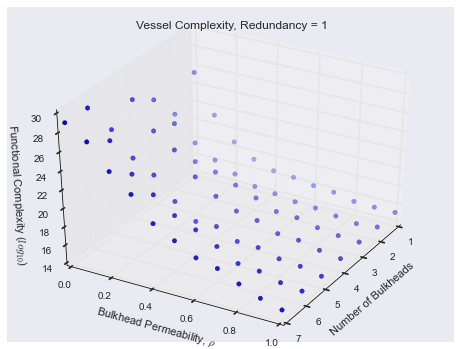

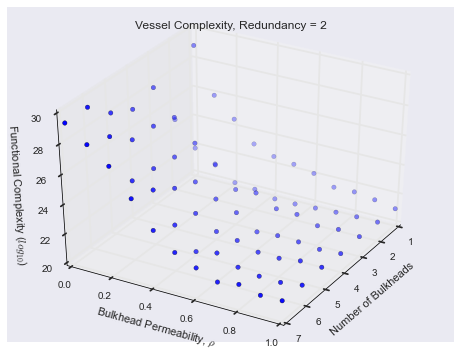

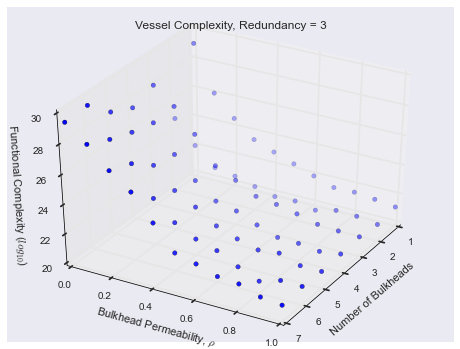

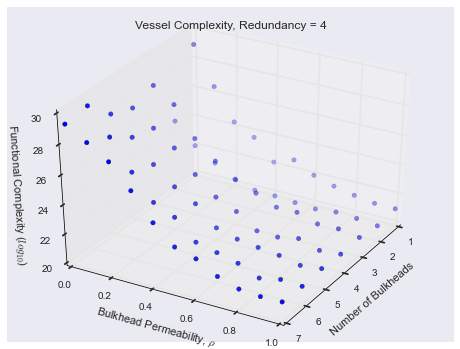

In [29]:
path_viz="C:\Users\colinsh\Documents\compship\Data\pics"

for red in xrange(1,5):
    fig_data=av_sep.loc[av_sep['redundancy']==red]
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111, projection='3d')
    ax.scatter(fig_data['num_bh'],
                   fig_data['permeability'],
                   fig_data['int_log'])
    ax.set_xlim(1,7)
    ax.set_ylim(0.0,1.0)
    ax.set_title('Vessel Complexity, Redundancy = {0}'.format(red))
    ax.set_xlabel('Number of Bulkheads')
    ax.set_ylabel(r'Bulkhead Permeability, $\rho$')
    ax.set_zlabel('Functional Complexity ($log_{10}$)')
    ax.view_init(elev=35.,azim=30)
    filename='functional_complexity_red{0}.png'.format(red)
    filename=os.path.join(path_viz, filename)
    fig.savefig(filename,transparent=True)

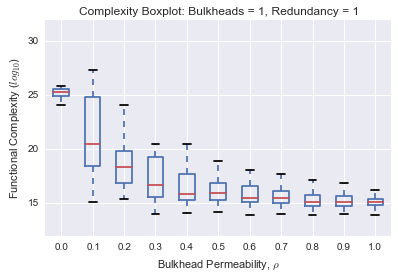

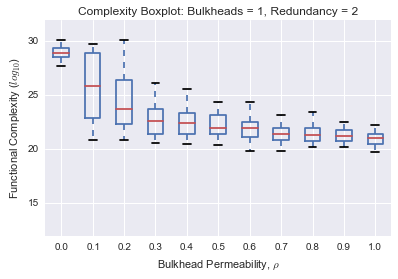

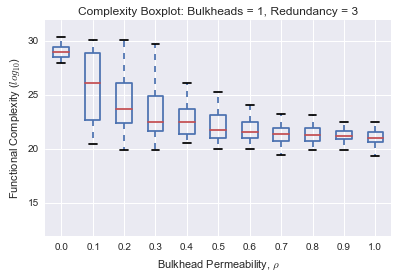

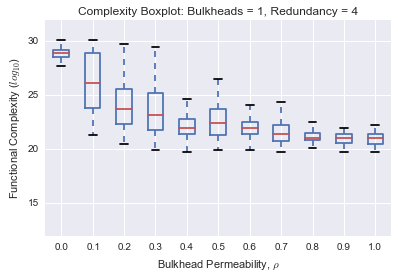

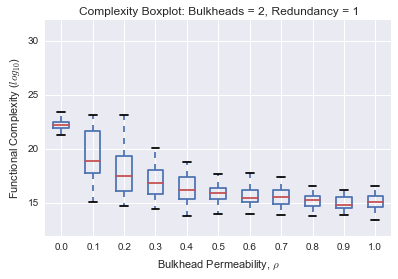

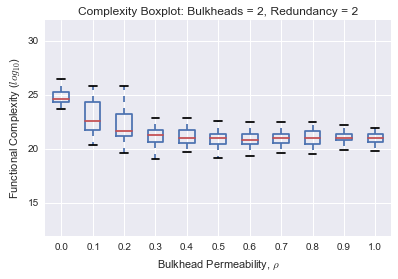

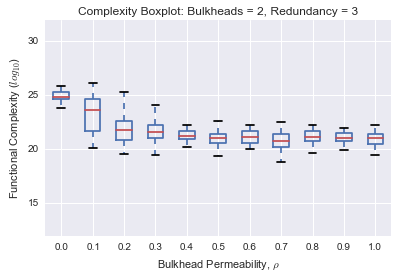

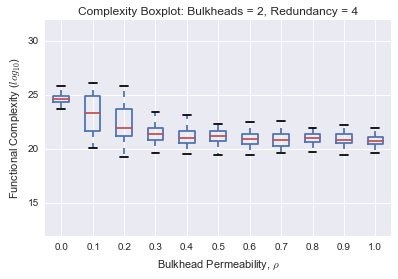

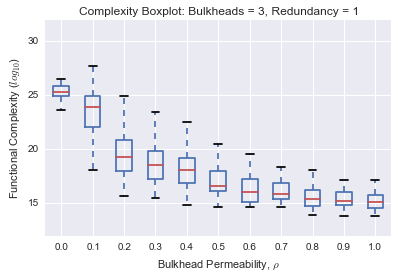

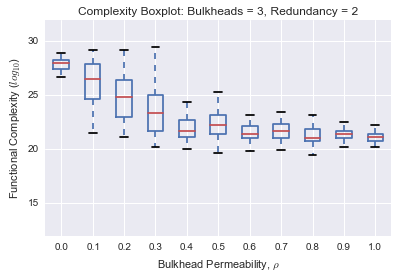

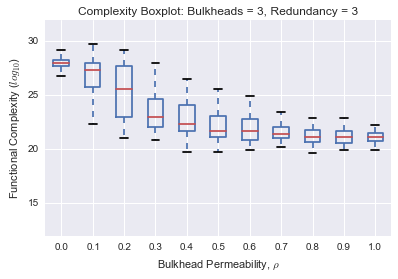

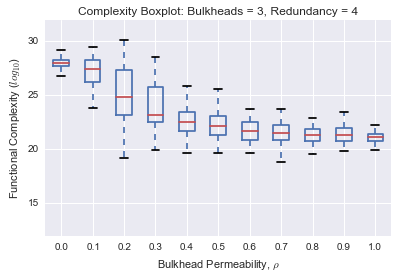

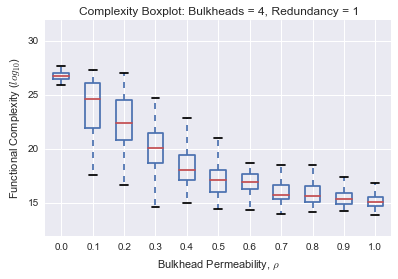

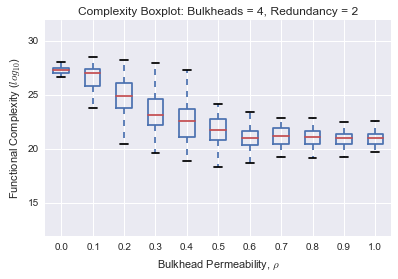

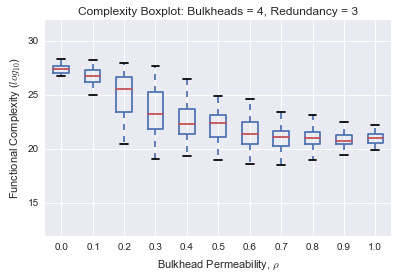

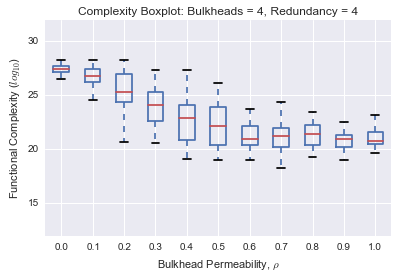

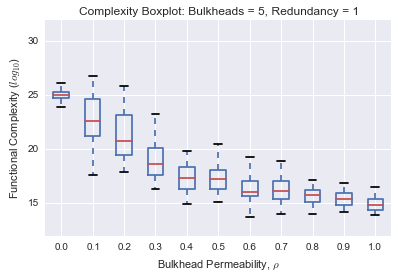

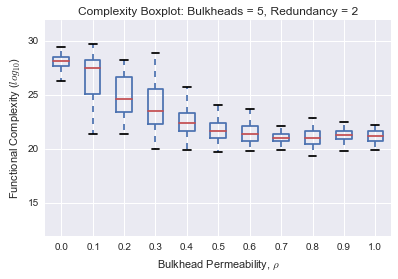

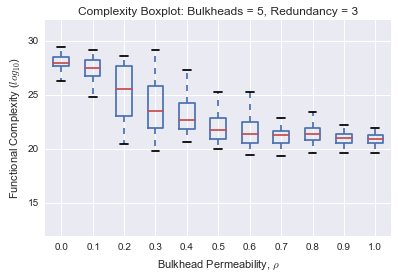

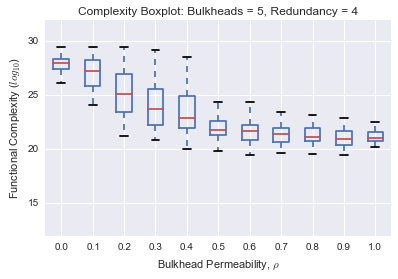

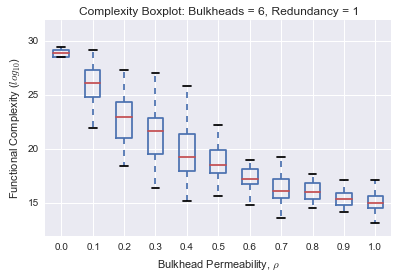

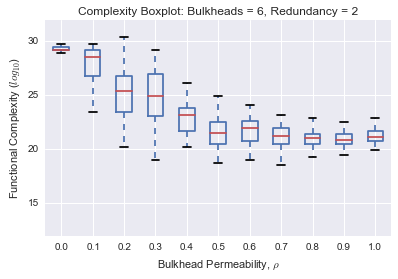

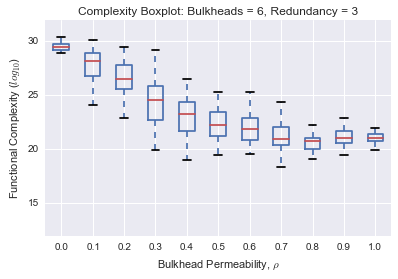

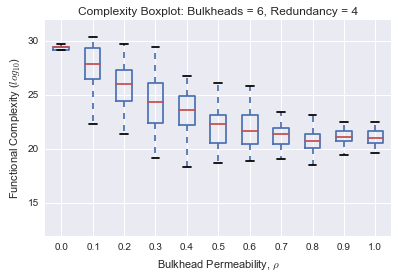

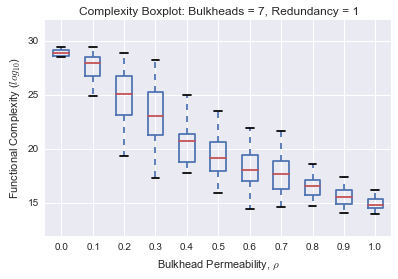

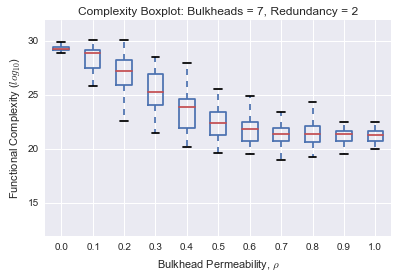

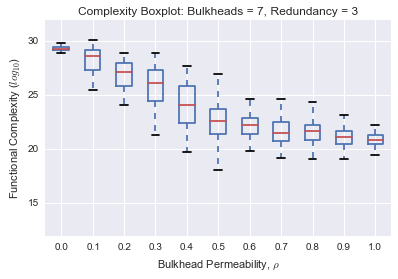

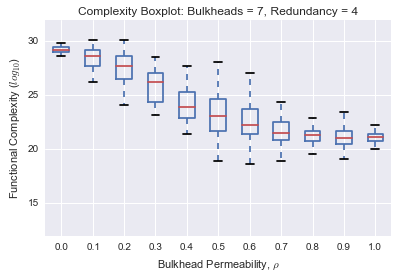

In [32]:
bh=7
for bh in xrange(1,8):
    for red in xrange(1,5):
        axes=all_data.loc[(all_data['num_bh']==bh) & (all_data['redundancy']==red)].boxplot(column='int_log',by='permeability')

        fig_title='Complexity Boxplot: Bulkheads = {0}, Redundancy = {1}'.format(bh,red)
        fig=axes.get_figure()
        fig.suptitle('')
        plt.xlabel(r'Bulkhead Permeability, $\rho$')
        plt.ylabel('Functional Complexity ($log_{10}$)')
        plt.ylim(12,32)
        plt.title(fig_title)
        filename='boxplot_bh{0}_red{1}'.format(bh,red)
        filename=os.path.join(path_viz, filename)
        plt.savefig(filename,transparency=True)




In [152]:
node_10=all_data.apply(lambda row: numpy.log10(row[nodes]),axis=1)
node_10['num_bh']=all_data['num_bh']
node_10['perm']=all_data['permeability'].astype(float)

node_ave=node_10.groupby(['num_bh','perm']).mean()
node_ave=node_ave.reset_index()
node_ave

,num_bh,perm,"(4, 2, 2)","(3, 0, 3)","(7, 1, 3)","(2, 2, 4)","(7, 2, 3)","(6, 0, 0)","(5, 2, 1)","(7, 1, 1)",...,"(2, 1, 2)","(5, 2, 5)","(4, 2, 4)","(1, 1, 1)","(2, 2, 2)","(2, 1, 0)","(1, 1, 3)","(2, 2, 0)","(4, 2, 0)","(3, 0, 1)"
0,1,0.0,0.000000,0,1.167996,0,0,0.000000,0.000000,5.71957,...,15.346509,0,0,7.140431,0.000000,11.017698,7.826780,0.000000,0.000000,0.000000
1,1,0.1,0.463586,0,1.083708,0,0,0.030103,0.078268,5.71957,...,15.214056,0,0,7.664224,0.282968,11.818438,7.640141,0.276948,0.397360,0.445524
2,1,0.2,0.475627,0,1.180038,0,0,0.030103,0.355215,5.71957,...,15.220077,0,0,7.585956,0.295009,12.577033,7.507688,0.535833,0.957275,0.776657
3,1,0.3,0.602060,0,1.107790,0,0,0.054185,0.421442,5.71957,...,15.659580,0,0,7.820759,0.403380,12.685404,7.399317,0.475627,0.668287,0.535833
4,1,0.4,0.132453,0,1.155955,0,0,0.054185,0.325112,5.71957,...,16.207455,0,0,8.338531,0.114391,13.088784,7.465544,0.409401,0.583998,0.415421
5,1,0.5,0.168577,0,1.149935,0,0,0.024082,0.264906,5.71957,...,16.370011,0,0,8.428840,0.150515,13.329608,7.585956,0.481648,0.740534,0.451545
6,1,0.6,0.120412,0,1.149935,0,0,0.030103,0.114391,5.71957,...,15.996734,0,0,8.627520,0.114391,13.823297,7.585956,0.252865,0.337154,0.228783
7,1,0.7,0.054185,0,1.071667,0,0,0.012041,0.066227,5.71957,...,16.845639,0,0,8.850282,0.054185,13.985854,7.477585,0.132453,0.228783,0.066227
8,1,0.8,0.066227,0,1.077687,0,0,0.006021,0.048165,5.71957,...,16.923906,0,0,8.784055,0.066227,14.172492,7.640141,0.174597,0.204700,0.048165
9,1,0.9,0.030103,0,1.137893,0,0,0.000000,0.024082,5.71957,...,17.044318,0,0,8.976714,0.018062,14.341069,7.573915,0.036124,0.048165,0.030103


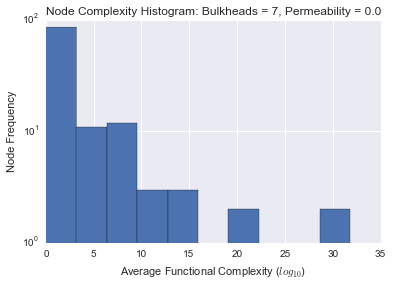

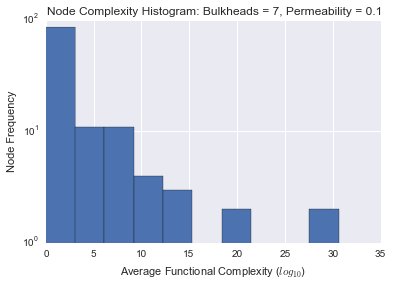

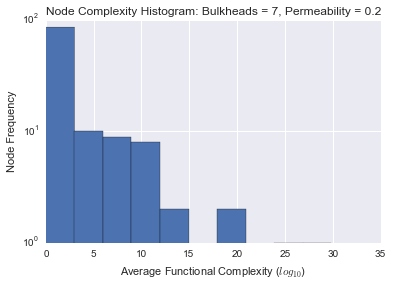

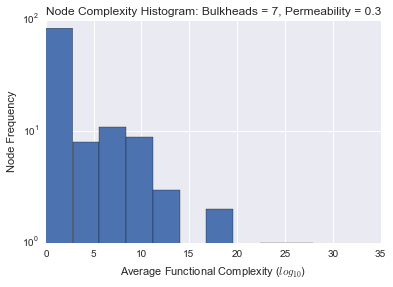

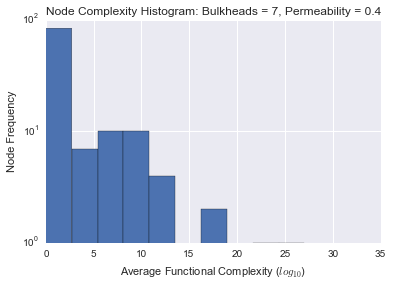

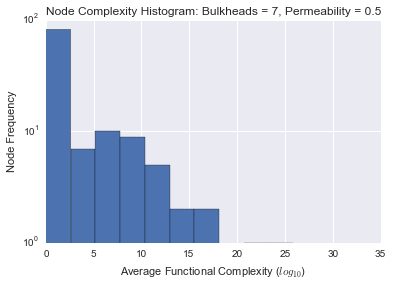

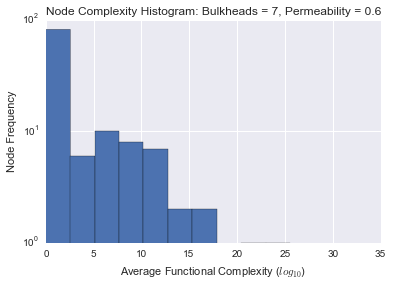

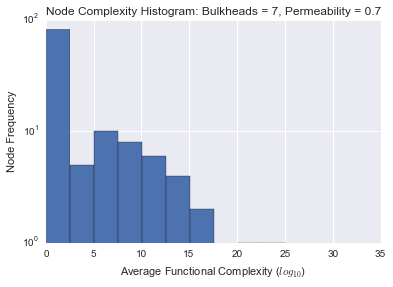

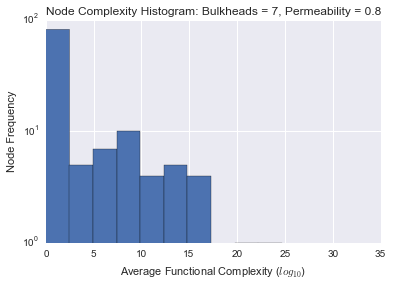

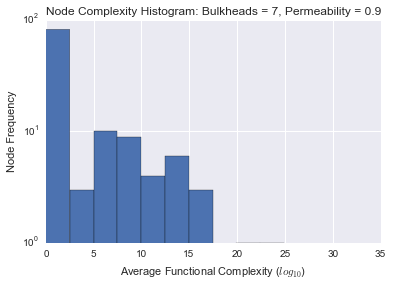

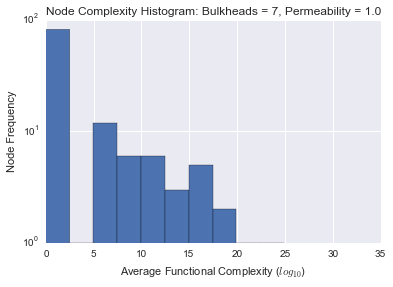

In [173]:
bh=7
p=.1

for n in xrange(0,11):
    p=n/10.0
    axes=node_ave.loc[(node_ave['num_bh']==bh) & (node_ave['perm']==p)].transpose().hist()
    fig.suptitle('')
    fig_title='Node Complexity Histogram: Bulkheads = {}, Permeability = {}'.format(bh,p)
    plt.xlabel('Average Functional Complexity ($log_{10}$)')
    plt.ylabel('Node Frequency')
    plt.xlim(0,35)
    plt.gca().set_yscale('log')
    plt.title(fig_title)
    save_title='n_hist_bh{}_p{}.png'.format(bh,n)
    plt.savefig(save_title,transparency=True)


In [169]:
edge_10=all_data.apply(lambda row: numpy.log10(row[edges]),axis=1)
edge_10['num_bh']=all_data['num_bh']
edge_10['perm']=all_data['permeability'].astype(float)

edge_ave=edge_10.groupby(['num_bh','perm']).mean()
edge_ave=edge_ave.reset_index()
edge_ave

,num_bh,perm,"((4, 2, 2), (4, 1, 2))","((4, 2, 2), (4, 2, 3))","((4, 2, 2), (3, 2, 2))","((4, 2, 2), (5, 2, 2))","((4, 2, 2), (4, 2, 1))","((3, 0, 3), (3, 0, 2))","((3, 0, 3), (4, 0, 3))","((3, 0, 3), (2, 0, 3))",...,"((0, 1, 1), (1, 1, 1))","((0, 1, 3), (1, 1, 3))","((5, 1, 4), (5, 2, 4))","((4, 0, 1), (3, 0, 1))","((5, 2, 4), (4, 2, 4))","((5, 2, 4), (5, 2, 5))","((6, 2, 3), (6, 1, 3))","((6, 2, 1), (6, 1, 1))","((2, 1, 2), (2, 2, 2))","((2, 1, 0), (2, 2, 0))"
0,1,0.0,0.000000,0,0.000000,0.000000,0.000000,0,0,0,...,3.889308,6.044682,0,0.000000,0,0,0,0.000000,0.000000,0.000000
1,1,0.1,0.144494,0,0.463586,0.144494,0.174597,0,0,0,...,4.425141,6.026621,0,0.295009,0,0,0,0.006021,0.132453,0.192659
2,1,0.2,0.144494,0,0.445524,0.180618,0.180618,0,0,0,...,4.569635,5.966415,0,0.439504,0,0,0,0.102350,0.216742,0.331133
3,1,0.3,0.186639,0,0.559916,0.252865,0.204700,0,0,0,...,4.744233,5.870085,0,0.421442,0,0,0,0.072247,0.276948,0.349195
4,1,0.4,0.078268,0,0.096330,0.030103,0.060206,0,0,0,...,4.991077,6.008559,0,0.325112,0,0,0,0.024082,0.090309,0.240824
5,1,0.5,0.072247,0,0.162556,0.090309,0.012041,0,0,0,...,4.973016,6.050703,0,0.349195,0,0,0,0.030103,0.132453,0.288989
6,1,0.6,0.036124,0,0.114391,0.078268,0.012041,0,0,0,...,5.189757,6.044682,0,0.132453,0,0,0,0.000000,0.096330,0.162556
7,1,0.7,0.024082,0,0.054185,0.030103,0.000000,0,0,0,...,5.249963,6.080806,0,0.042144,0,0,0,0.012041,0.048165,0.078268
8,1,0.8,0.018062,0,0.066227,0.042144,0.006021,0,0,0,...,5.207819,6.008559,0,0.048165,0,0,0,0.018062,0.060206,0.114391
9,1,0.9,0.006021,0,0.030103,0.024082,0.000000,0,0,0,...,5.280066,6.074785,0,0.030103,0,0,0,0.006021,0.018062,0.018062


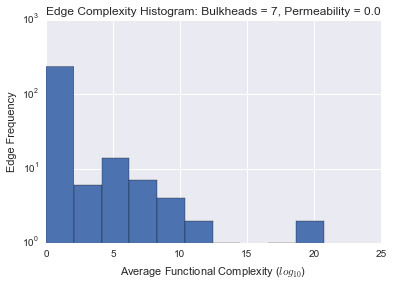

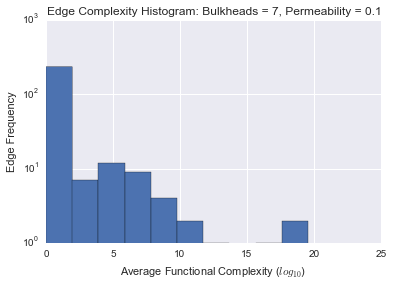

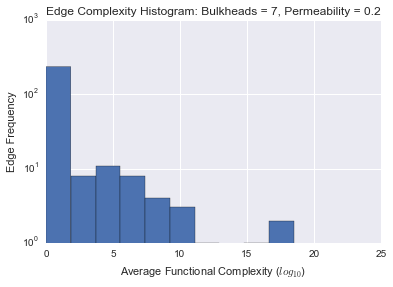

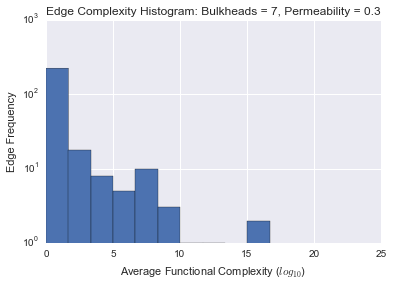

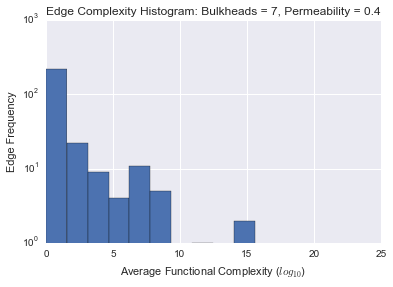

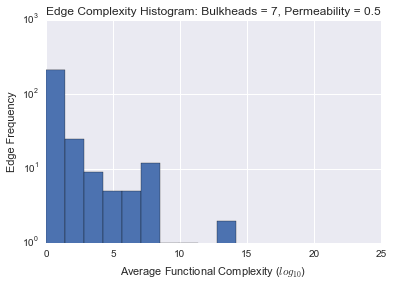

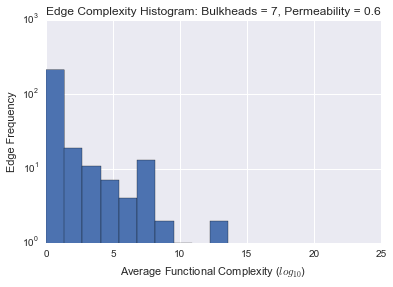

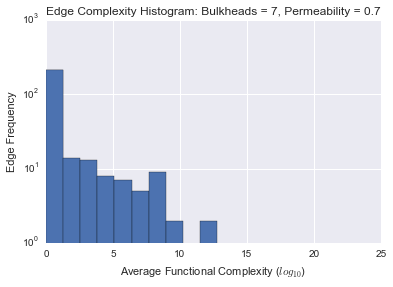

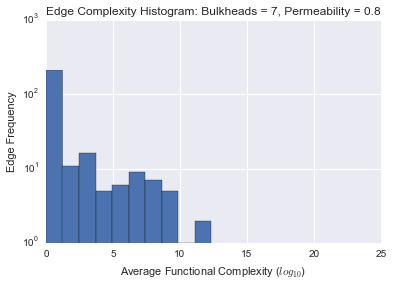

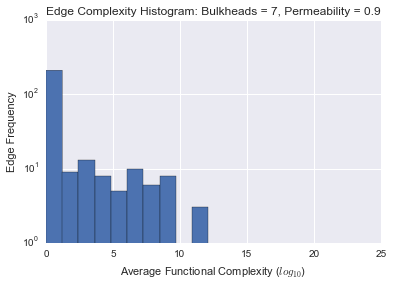

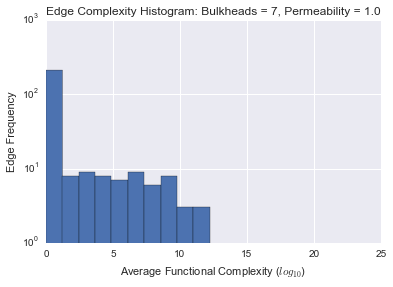

In [175]:
bh=7


for n in xrange(0,11):
    p=n/10.0
    axes=edge_ave.loc[(edge_ave['num_bh']==bh) & (edge_ave['perm']==p)].transpose().hist()
    fig.suptitle('')
    fig_title='Edge Complexity Histogram: Bulkheads = {}, Permeability = {}'.format(bh,p)
    plt.xlabel('Average Functional Complexity ($log_{10}$)')
    plt.ylabel('Edge Frequency')
    plt.xlim(0,25)
    plt.gca().set_yscale('log')
    plt.title(fig_title)
    save_title='e_hist_bh{}_p{}.png'.format(bh,n)
    plt.savefig(save_title,transparency=True)